# Orlando Crime Analysis - Esri SE Concference

## Updates Notes

#### 1) Most Recent Month - Feb 2022

* Feb 11, 2022 Thursday
    * Spatial Join to the Grids for the analysis
        * Spatial join with crime points (total Number)
        * Spatial join with ACS data
    <br>
    <br>
* Feb 10, 2022 Thursday
    * OPD Grids uploaded to ArcGIS Online
        * Import csv and convert it to gdf
        * Export it to shp
        * Re-import it as sdf
        * Re-export it as layer to ArcGIS Online
    <br>
    <br>
* Feb 9, 2022 Wednesday
    * Crated a webmap of Crime Points, ACS Census Block Groups, and Heatmaps of Crime Points from 2010 to 2020
    * Research the issue on the jurisdiction differences between Census Block Groups and Neighborhoods in the City of Orlando
    * Aggregate number of crimes by Census Block Group / Neighborhoods for the City of Orlando
    <br>
    <br>
* Feb 8, 2022 Tuesday
    * Problem solved - issue on the "You need to be signed in to use spatial analysis"
        * => 1) After restart kernel, log-in to arcgis online account again: gis = GIS("https://www.arcgis.com", "your_id", "your_password")
        * => 2) Use a projected shapefile with no missing value
        * https://community.esri.com/t5/arcgis-api-for-python-questions/you-need-to-be-signed-in-to-use-spatial-analysis/td-p/751603
        * https://github.com/danioxoli/HotSpotAnalysis_Plugin/issues/36#issuecomment-509184014
    * Created a crime hotspots map with map widget
    * Exported a web map from map widget to ArcGIS Online
    <br>
    <br>
* Feb 7, 2022 Monday
    * Created a correlation plot of all ACS data by crime offense cateogry
    * Created two maps of crime points and ACS block data using Map Widget
    <br>
    <br>
* Feb 4, 2022 Friday
    * Create crime heatmaps of Day of week and Hours by Crime Categories
    * Craete correlation plots of ACS data (Housing vacancy change, Median housing rent, Un-employment rate, Precetange of educational attainment less than high school diploma) 
    <br>
    <br>
* Feb 2, 2022 Wednesday
    * Complete all spatial join and created plots
    * Finally complete the troubleshooting on installing geopandas!
        * 1) deleted all environments except base and arcgspro-py3 base in Python Prompt Command.
        * 2) After rebooting, set the environment to arcgispro-py3 base, and then created clone environment in Python Prompt Command: 'conda create -n yourcloneenv --clone arcgispro-py3'
        * 3) After rebooting again, installed the anaconda in Python Prompt Command: 'conda install anaconda'
        * 4) After rebooting one more time, updated all environments in Python Commnad Prompt: 'conda update --all'
        * 5) After rebooting, installed geopandas in Python Prompt Command: 'conda install geopandas'
        * 6) Successfully imported geopandas in Jupyter Notebook in ArcGIS Pro
    <br>
    <br>
* Feb 1, 2022 Tuesday
    * Spatial join the neighborhood join data with the census block data
    * Trying to solve the error issue on installing Geopandas - Not solved yet
    <br>
    <br>

#### 2) Archive

* Jan 31, 2022 Monday
    * Complete the getting ACS block data in 2015 and 2019 in R
    * Trying to solve the error issue on exporting the completed spatial dataframe to a shapefile in a local drive as well as to a layer in ArcGIS Online - Not solved yet
    <br>
    <br>
* Jan 28, 2022 Friday
    * Spatial joined the neighborhood crime data with the census block data in 2019 and 2015.
    * Included more variables into ACS block data, such as Housing monthly owner costs, available vehicles by household, and transportation means to work - did not finish
    <br>
    <br>
* Jan 27, 2022 Thursday
    * Created the new census data based on census blocks in 2015, 2019 (ACS-5 years estiamtes)
    * Trying to solve the error issue on exporting the completed spatial dataframe to a shapefile in a local drive as well as to a layer in ArcGIS Online - Not solved yet
    <br>
    <br>    
* Jan 26, 2022 Wednesday
    * Crime Analysis Solutions - Analysis Reference
    * Create analysis layers 
        * Hotspot-coldspot analysis
        * Emerging Hotspot-coldspot Analysis
        * Optimized Hotspot Analysis
    <br>
    <br>            
* Jan 25, 2022
    * Referenceed the Esri's Crime Analysis Solutions
    * Import the collected ACS data and merge it wiht the orlando crime data
    * Create scatter plots with the varaibles to check correlations
    * Troubleshooting on installing Geopandas
        * Could not solve -> instead solved the issue at R, and imported to Notebook
    <br>
    <br>            
* Jan 24, 2022
    * Manpulate ACS data and create new columns and maps by using R (OPD_Crime_Analysis_220124.R)
    * Craete a barplot for densities as well as a heatmap of crime incidents by day of week and hour of day
    <br>
    <br>        
* Jan 21, 2022
    * sovle the isuse on python environment: cannot install python module with pip install, conda install
        * => create new python environment: Command Prompt, conda create -k --clone arcgispro-py3 --name arcgispro-py3-clone
    * Research census data related to the crime data (modeling for crime)
    * Collect ACS in R and import them (OPD_Crime_Analysis_220121.R)
    <br>
    <br>        
* Jan 20, 2022 
    * Spatial join crime data with neighborhoods shapefile
    * Create a bar plot of crime cases by neighborhoods in 2020
    <br>
    <br>        
* Jan 19, 2022
    * Develop and re-organize analysis process
    * 3. Data Wrangling - 1) Read CSV, 2) Check data, 3) Clean data
    <br>
    <br>        
* Jan 18. 2022
    * Develop datetime analysis and create three plots

## 0. Configuration

In [31]:
# Python
import requests
import sys
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import geopandas as gpd
from datetime import datetime as dt
from dateutil import parser
from IPython.core.pylabtools import figsize
from IPython.display import display, Image, HTML
from osgeo import osr, gdal
from scipy import stats
from shapely import wkt
import ast
import csv
import fiona
import json
fiona.supported_drivers  
import os

# ArcGIS API
import arcgis
from arcgis.gis import GIS
from arcgis.mapping import WebMap
from arcgis.features import SpatialDataFrame
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.features import summarize_data
from arcgis.features import use_proximity
from arcgis.features.analyze_patterns import find_hot_spots
from arcgis.features.enrich_data import enrich_layer
from arcgis.features.find_locations import find_existing_locations
from arcgis.features.manage_data import overlay_layers
from arcgis.geocoding import geocode
from arcgis.geoenrichment import Country
from arcgis.geometry import lengths, areas_and_lengths, project, Point, Polyline, Polygon, Geometry
from arcgis.geoprocessing import import_toolbox

# Machine Leaning
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as metrics

In [32]:
# LOG-IN TO ARCGIS ONLINE
gis = GIS("https://www.arcgis.com", "kjhoon", "Apotheosis3267!")

In [33]:
# Set the data path in this project
data_pth = r'C:/Users/KIM36105/Downloads/Orlando_Crime_Analysis'

## 4. Geoenrichment

### 1) OPD Grids

#### 1-0. Backgrounds of using OPD Grids

One issue on this process is the jurisdiction differences between the census block groups and neighborhoods in the City of Orlando.

1) Analysis by Census Block Group <br>
Some of census blcok groups, especially located in the edges of the City, only cover the limited area <br>
    => This means that the crimes outside of the City and inside of Census blcoks cannot be collected 
    <br><br>
2) Analysis by Neighborhoods <br>
Most neighborhoods covers the multiple census block groups, and it would affect the data quality assurance if the number is re-calcualted <br>
    => e.g. As the below screenshot, Richmond Heights and Lake Richmond covers at least two census block groups <br>
    => Based on the siutaiton, the scenario 2 can result more unaccuracy for modeling the crime prediction in Orlando than the scenario 2. 

3) Analysis by Grids
OPD grids can be helpful for developing prediction model since the scale is smaller than neighborhoods and census tract blocks. <br>
After joined with the ACS and crime data, it can be used for regression modeling. The steps of analysis are as follows;
1. Aggregate Crime Points by OPD Grids <br>
=>(1) Create copies of OPD grids and crimes <br>
=>(2) Spatial join the two sdf (left: Crime / right: OPD Grids) <br>
=>(3) Group_by OPD Grids and get the 'counts' nubmer <br>
=>(4) Extract the 'Total crime counts' column, and append it to the Crime Grids sdf <br>
2. Capture ACS data by OPD Grids <br>
=>(1) Spatial Join the two sdf (left: OPD Grids / right: ACS data) <br>
=>(2) Drop unnecessary columns

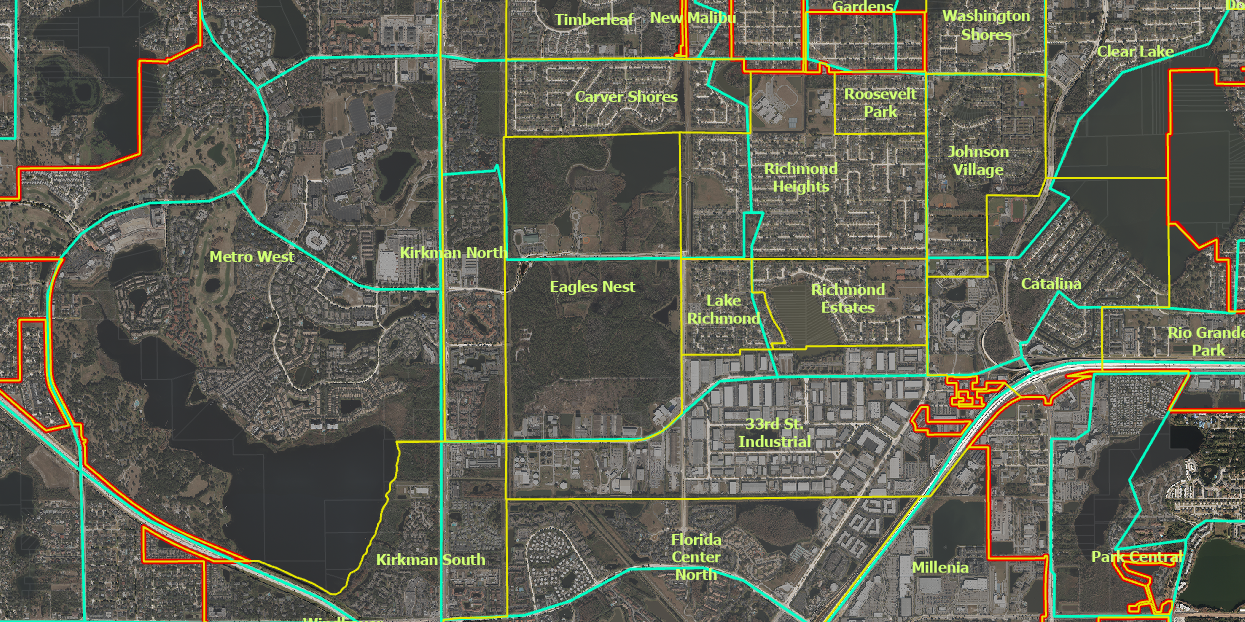

In [10]:
# csv to dataframe
OPDgrids_df = pd.read_csv(r'C:\Users\KIM36105\Downloads\Orlando_Crime_Analysis\csv\OPD_Grids.csv')
OPDgrids_df = OPDgrids_df.rename({'the_geom': 'SHAPE'}, axis = 'columns')
OPDgrids_df_SHAPE = OPDgrids_df[['SHAPE']]
OPDgrids_df_SHAPE

,SHAPE
0,MULTIPOLYGON (((-81.177636320399 28.4736305814...
1,MULTIPOLYGON (((-81.185958641861 28.4882695979...
2,MULTIPOLYGON (((-81.236341557478 28.5541998666...
3,MULTIPOLYGON (((-81.35956621674 28.47295253385...
4,MULTIPOLYGON (((-81.499564233002 28.3914639272...
...,...
1567,MULTIPOLYGON (((-81.302480544522 28.5536952662...
1568,MULTIPOLYGON (((-81.252424112263 28.5246530119...
1569,MULTIPOLYGON (((-81.375809055895 28.4142650340...
1570,MULTIPOLYGON (((-81.24499704814 28.59738609441...


In [100]:
# Read grid csv, and change it to gdf
OPDgrids_df = pd.read_csv(r'C:\Users\KIM36105\Downloads\Orlando_Crime_Analysis\csv\OPD_Grids.csv')
OPDgrids_df = OPDgrids_df.rename({'the_geom': 'geometry'}, axis = 'columns')
OPDgrids_df['geometry'] = OPDgrids_df['geometry'].apply(wkt.loads)
OPDgrids_gdf = gpd.GeoDataFrame(OPDgrids_df, geometry = OPDgrids_df.geometry)
OPDgrids_gdf.to_crs = {"init": "EPSG:4326"}
# Export the gdf to shapefile
OPDgrids_gdf.to_file(driver = 'ESRI Shapefile', filename= r'C:\Users\KIM36105\Downloads\Orlando_Crime_Analysis\OPDgrids_shp.shp')

In [105]:
# Reading the shapefile as sdf, and export it to ArcGIS Online
OPDgrids_shp = r"OPDgrids_shp.shp"
OPDgrids_sdf = pd.DataFrame.spatial.from_featureclass(os.path.join(data_pth, OPDgrids_shp))
OPDgrids_lyr = OPDgrids_sdf.spatial.to_featurelayer('OPD_Grids_220210',
                                                    folder = '1_ORL_Crime')
OPDgrids_lyr
# id = 2dff161d516645a79d7cca48e31ee4ce

<Item title:"OPD_Grids_220210" type:Feature Layer Collection owner:kjhoon>

In [4]:
# Create a map_widget to plot the OPD grids on the map widget
Map_OPD_Grids = gis.map('Orlando, FL, USA',
                        zoomlevel =11)
Map_OPD_Grids.basemap = 'dark-gray-vector'
Map_OPD_Grids.legend = True

CityLimit_lyr = GIS().content.get("c104e569cd0f43c19cf3e379e7a8a3c5").layers[1]
Map_OPD_Grids.add_layer(CityLimit_lyr, {
    "renderer": {"type": "simple",
                 "symbol": {
                     "type":"esriSFS",
                     "style":"esriSFSSolid",
                     "color":[133,133,133,150],
                     "outline":{
                         "type":"esriSLS",
                         "style":"esriSLSSolid",
                         "color":[200,200,200,255],
                         "width":1}}}})

OPDgrids_lyr = GIS().content.get("2dff161d516645a79d7cca48e31ee4ce").layers[0]
Map_OPD_Grids.add_layer(OPDgrids_lyr, {
    "renderer": "type:simple",
    "symbol": {
        "type": "esriSFS",
        "style": "esriSFSSolid",
        "color": [0,0,0,0],
        "outline": {
            "type": "esriSLS",
            "style": "EsriSLSSolid",
            "color": [50,197,255,88],
            "width": 0.5}}})

Map_OPD_Grids

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [5]:
Map_OPD_Grids.zoom_to_layer(CityLimit_lyr)

#### 1-1. Aggregate Crime Points by OPD Grids

In [6]:
# (1) Create sdfs of OPD grids and crimes, and copy them

# OPD Grids
OPDgrids_sdf = pd.DataFrame.spatial.from_layer(OPDgrids_lyr)
OPDgrids_sdf['SHAPE'] = OPDgrids_sdf['SHAPE'].geom.project_as(4326)

# Crime Points 2019
CrimePoints19_lyr = GIS().content.get("22e8f7cfe5a44a55aea5ddeda1a016e0").layers[0]
CrimePoints19_sdf = pd.DataFrame.spatial.from_layer(CrimePoints19_lyr)
CrimePoints19_sdf['SHAPE'] = CrimePoints19_sdf['SHAPE'].geom.project_as(4326)

# Copy of the layers
OPDgrids_sdf_copy = OPDgrids_sdf.copy()
CrimePoints19_sdf_copy = CrimePoints19_sdf.copy()

In [7]:
# (2) Spatial join the two sdf (left: Crime / right: OPD Grids)
Crime19_OPDgrids_sdf = CrimePoints19_sdf_copy.spatial.join(OPDgrids_sdf_copy)
Crime19_OPDgrids_sdf.head()

,OBJECTID_left,SHAPE,case_date_time,case_disposition,case_location,case_number,case_offense_category,case_offense_charge_type,case_offense_location_type,case_offense_type,date,day,day_night,hour,latitude,location,longitude,month,status,time,weekday,year,index_right,OBJECTID_right,fid,grid,id,Shape__Area,Shape__Length
0,1,"{""x"": -81.43691171999997, ""y"": 28.602354260000...",2019-01-03 08:22:00,Closed,4900 Block of FIJI CIR,2019-00002818,Theft,Committed,Residence/Single,All other larceny,2019-01-03,3,DayTime,8,28.60235426,"28.60235426, -81.43691172",-81.43691172,1,Mapped,08:22:00,3,2019,725,726,725,677,77,843764.166016,3675.396727
1,36,"{""x"": -81.44104680999999, ""y"": 28.597890020000...",2019-05-01 21:45:00,Closed,4500 Block of RING NECK RD,2019-00164779,Burglary,Committed,Residence/Single,Burglary/breaking and entering,2019-05-01,1,NightTime,21,28.59789002,"28.59789002, -81.44104681",-81.44104681,5,Mapped,21:45:00,2,2019,725,726,725,677,77,843764.166016,3675.396727
2,44,"{""x"": -81.43587121999997, ""y"": 28.600239950000...",2019-04-29 06:44:00,Closed,4300 Block of FOUNTAINVIEW LN,2019-00160779,Assault,Committed,Parking Lot - Surface,Simple assault,2019-04-29,29,NightTime,6,28.60023995,"28.60023995, -81.43587122",-81.43587122,4,Mapped,06:44:00,0,2019,725,726,725,677,77,843764.166016,3675.396727
3,201,"{""x"": -81.43928343999994, ""y"": 28.598180740000...",2019-06-10 17:51:00,Arrest,ROSE BAY DR / LANDING DR,2019-00219353,Narcotics,Committed,Parking Lot - Mall,Drugs/narcotics,2019-06-10,10,DayTime,17,28.59818074,"28.59818074, -81.43928344",-81.43928344,6,Mapped,17:51:00,0,2019,725,726,725,677,77,843764.166016,3675.396727
4,268,"{""x"": -81.43816950999997, ""y"": 28.600394870000...",2019-04-13 08:55:00,Closed,4400 Block of FOUNTAINVIEW LN,2019-00139061,Theft,Committed,Apartment/Condo,All other larceny,2019-04-13,13,DayTime,8,28.60039487,"28.60039487, -81.43816951",-81.43816951,4,Mapped,08:55:00,5,2019,725,726,725,677,77,843764.166016,3675.396727


In [8]:
# (3) Group_by OPD Grids and get the 'counts' nubmer
# Crime19_OPDgrids_sdf_gruopby
Crime19_groupby_OPDgrids_sdf = Crime19_OPDgrids_sdf.groupby(['id']).size().reset_index(name='Crime19')
Crime19_groupby_OPDgrids_sdf.head()

,id,Crime19
0,16,35
1,17,3
2,18,9
3,21,1
4,30,1


In [9]:
# (4) Extract the 'Total crime counts' column, and append it to the Crime Grids sdf
OPDgrids_Crime19_sdf = OPDgrids_sdf.merge(Crime19_groupby_OPDgrids_sdf, on='id')
OPDgrids_Crime19_sdf.head()

,OBJECTID,fid,grid,id,Shape__Area,Shape__Length,SHAPE,Crime19
0,10,9,1425,463,841359.544922,3669.942248,"{'rings': [[[-81.45106416799999, 28.5377421160...",15
1,12,11,603,33,873769.478516,3741.654410,"{'rings': [[[-81.45157113700002, 28.6037122740...",27
2,13,12,2456,955,857733.294922,3704.582079,"{'rings': [[[-81.29344057699997, 28.4514480870...",7
3,18,17,3414,1391,845953.154297,3679.216642,"{'rings': [[[-81.24411729099998, 28.3853556150...",4
4,21,20,2179,829,856010.171875,3700.898376,"{'rings': [[[-81.26894649999997, 28.4734988120...",8


#### 1-2. Capture ACS data by OPD Grids

In [10]:
# (1) Spatial Join the two sdf (left: OPD Grids with Crime 19 / right: ACS data)
# Get ACS data
ACSPolygon_lyr = GIS().content.get("7aded098d30b4607a52f5a1d2b95c82e").layers[0]
ACSPolygon_sdf = pd.DataFrame.spatial.from_layer(ACSPolygon_lyr)
ACSPolygon_sdf['SHAPE'] = ACSPolygon_sdf['SHAPE'].geom.project_as(4326)
OPDgrids_Crime19_ACSPolygon_sdf = OPDgrids_Crime19_sdf.spatial.join(ACSPolygon_sdf)
OPDgrids_Crime19_ACSPolygon_sdf.head()

,OBJECTID_left,fid_left,grid,id,Shape__Area_left,Shape__Length_left,SHAPE,Crime19,index_right,OBJECTID_right,fid_right,geoid,pp_t_19,pp_t_17,pp_t_97,hh_t_19,hh_t_17,hh_t_97,rc_w_19,rc_f_19,rc_h_19,rc_s_19,rc_t_19,rc_w_17,rc_f_17,rc_h_17,rc_s_17,rc_t_17,rc_w_97,rc_f_97,rc_h_97,rc_s_97,rc_t_97,hs_v_19,hs_v_17,hs_v_97,hs_mr_19,hs_mr_17,hs_m_97,hs_c_19,...,tp_c_19,tp_p_19,tp_b_19,tp_w_19,tp_t_19,tp_h_19,tp_1_17,tp_c_17,tp_p_17,tp_b_17,tp_w_17,tp_t_17,tp_h_17,tp_1_97,tp_c_97,tp_p_97,tp_b_97,tp_w_97,tp_t_97,tp_h_97,c_01_19,cp_s_19,c_00_19,in_y_19,in_b_19,in_n_19,c_01_17,cp_s_17,c_00_17,in_y_17,in_b_17,in_n_17,c_01_97,cp_s_97,c_00_97,in_y_97,in_b_97,in_n_97,Shape__Area_right,Shape__Length_right
0,10,9,1425,463,841359.544922,3669.942248,"{""rings"": [[[-81.45106416799999, 28.5377421160...",15,131,132,131,120950146011,3228,2468,30.8,964,774,24.5,1.5,83.1,15.5,0.0,0.0,1.1,85.5,9.6,2.7,1.1,0.4,-2.4,-2.4,-2.7,-1.1,15.7,17.5,-1.8,935,528,77.1,498,...,4.7,20.8,0.0,0.0,0.0,0.0,82.1,4.7,13.1,0.0,0.0,0.0,0.0,-7.6,0.0,7.7,0.0,0.0,0.0,0.0,71.0,63.1,29.0,62.8,36.8,37.2,64.0,51.6,36.0,56.7,39.1,43.3,7.0,11.5,-7.0,6.1,-2.3,-6.1,2.416569e+06,7378.084908
1,677,676,1513,507,855601.498047,3700.520295,"{""rings"": [[[-81.44281108499995, 28.5306334280...",49,131,132,131,120950146011,3228,2468,30.8,964,774,24.5,1.5,83.1,15.5,0.0,0.0,1.1,85.5,9.6,2.7,1.1,0.4,-2.4,-2.4,-2.7,-1.1,15.7,17.5,-1.8,935,528,77.1,498,...,4.7,20.8,0.0,0.0,0.0,0.0,82.1,4.7,13.1,0.0,0.0,0.0,0.0,-7.6,0.0,7.7,0.0,0.0,0.0,0.0,71.0,63.1,29.0,62.8,36.8,37.2,64.0,51.6,36.0,56.7,39.1,43.3,7.0,11.5,-7.0,6.1,-2.3,-6.1,2.416569e+06,7378.084908
2,768,767,1339,421,846212.341797,3679.672791,"{""rings"": [[[-81.43442710599996, 28.5453204380...",85,131,132,131,120950146011,3228,2468,30.8,964,774,24.5,1.5,83.1,15.5,0.0,0.0,1.1,85.5,9.6,2.7,1.1,0.4,-2.4,-2.4,-2.7,-1.1,15.7,17.5,-1.8,935,528,77.1,498,...,4.7,20.8,0.0,0.0,0.0,0.0,82.1,4.7,13.1,0.0,0.0,0.0,0.0,-7.6,0.0,7.7,0.0,0.0,0.0,0.0,71.0,63.1,29.0,62.8,36.8,37.2,64.0,51.6,36.0,56.7,39.1,43.3,7.0,11.5,-7.0,6.1,-2.3,-6.1,2.416569e+06,7378.084908
3,992,991,1514,508,865789.369141,3722.048969,"{""rings"": [[[-81.43441893399994, 28.5307120580...",68,131,132,131,120950146011,3228,2468,30.8,964,774,24.5,1.5,83.1,15.5,0.0,0.0,1.1,85.5,9.6,2.7,1.1,0.4,-2.4,-2.4,-2.7,-1.1,15.7,17.5,-1.8,935,528,77.1,498,...,4.7,20.8,0.0,0.0,0.0,0.0,82.1,4.7,13.1,0.0,0.0,0.0,0.0,-7.6,0.0,7.7,0.0,0.0,0.0,0.0,71.0,63.1,29.0,62.8,36.8,37.2,64.0,51.6,36.0,56.7,39.1,43.3,7.0,11.5,-7.0,6.1,-2.3,-6.1,2.416569e+06,7378.084908
4,1118,1117,1427,465,859803.433594,3709.194727,"{""rings"": [[[-81.43441893399994, 28.5307120580...",32,131,132,131,120950146011,3228,2468,30.8,964,774,24.5,1.5,83.1,15.5,0.0,0.0,1.1,85.5,9.6,2.7,1.1,0.4,-2.4,-2.4,-2.7,-1.1,15.7,17.5,-1.8,935,528,77.1,498,...,4.7,20.8,0.0,0.0,0.0,0.0,82.1,4.7,13.1,0.0,0.0,0.0,0.0,-7.6,0.0,7.7,0.0,0.0,0.0,0.0,71.0,63.1,29.0,62.8,36.8,37.2,64.0,51.6,36.0,56.7,39.1,43.3,7.0,11.5,-7.0,6.1,-2.3,-6.1,2.416569e+06,7378.084908


In [11]:
# (2) Drop unnecessary columns
OPDgrids_cleaned_sdf = OPDgrids_Crime19_ACSPolygon_sdf.drop(["OBJECTID_left",
                                                             "fid_left",
                                                             "index_right",
                                                             "OBJECTID_right",
                                                             "fid_right",
                                                             "Shape__Area_right",
                                                             "Shape__Length_right"
                                                            ], axis=1)
OPDgrids_cleaned_sdf.head()

,grid,id,Shape__Area_left,Shape__Length_left,SHAPE,Crime19,geoid,pp_t_19,pp_t_17,pp_t_97,hh_t_19,hh_t_17,hh_t_97,rc_w_19,rc_f_19,rc_h_19,rc_s_19,rc_t_19,rc_w_17,rc_f_17,rc_h_17,rc_s_17,rc_t_17,rc_w_97,rc_f_97,rc_h_97,rc_s_97,rc_t_97,hs_v_19,hs_v_17,hs_v_97,hs_mr_19,hs_mr_17,hs_m_97,hs_c_19,hs_c_17,hs_c_97,h_10_19,h_0009_19,h_8099_19,...,ed_d_97,tp_1_19,tp_c_19,tp_p_19,tp_b_19,tp_w_19,tp_t_19,tp_h_19,tp_1_17,tp_c_17,tp_p_17,tp_b_17,tp_w_17,tp_t_17,tp_h_17,tp_1_97,tp_c_97,tp_p_97,tp_b_97,tp_w_97,tp_t_97,tp_h_97,c_01_19,cp_s_19,c_00_19,in_y_19,in_b_19,in_n_19,c_01_17,cp_s_17,c_00_17,in_y_17,in_b_17,in_n_17,c_01_97,cp_s_97,c_00_97,in_y_97,in_b_97,in_n_97
0,1425,463,841359.544922,3669.942248,"{""rings"": [[[-81.45106416799999, 28.5377421160...",15,120950146011,3228,2468,30.8,964,774,24.5,1.5,83.1,15.5,0.0,0.0,1.1,85.5,9.6,2.7,1.1,0.4,-2.4,-2.4,-2.7,-1.1,15.7,17.5,-1.8,935,528,77.1,498,718,-30.6,0.0,9.5,11.5,...,0.0,74.5,4.7,20.8,0.0,0.0,0.0,0.0,82.1,4.7,13.1,0.0,0.0,0.0,0.0,-7.6,0.0,7.7,0.0,0.0,0.0,0.0,71.0,63.1,29.0,62.8,36.8,37.2,64.0,51.6,36.0,56.7,39.1,43.3,7.0,11.5,-7.0,6.1,-2.3,-6.1
1,1513,507,855601.498047,3700.520295,"{""rings"": [[[-81.44281108499995, 28.5306334280...",49,120950146011,3228,2468,30.8,964,774,24.5,1.5,83.1,15.5,0.0,0.0,1.1,85.5,9.6,2.7,1.1,0.4,-2.4,-2.4,-2.7,-1.1,15.7,17.5,-1.8,935,528,77.1,498,718,-30.6,0.0,9.5,11.5,...,0.0,74.5,4.7,20.8,0.0,0.0,0.0,0.0,82.1,4.7,13.1,0.0,0.0,0.0,0.0,-7.6,0.0,7.7,0.0,0.0,0.0,0.0,71.0,63.1,29.0,62.8,36.8,37.2,64.0,51.6,36.0,56.7,39.1,43.3,7.0,11.5,-7.0,6.1,-2.3,-6.1
2,1339,421,846212.341797,3679.672791,"{""rings"": [[[-81.43442710599996, 28.5453204380...",85,120950146011,3228,2468,30.8,964,774,24.5,1.5,83.1,15.5,0.0,0.0,1.1,85.5,9.6,2.7,1.1,0.4,-2.4,-2.4,-2.7,-1.1,15.7,17.5,-1.8,935,528,77.1,498,718,-30.6,0.0,9.5,11.5,...,0.0,74.5,4.7,20.8,0.0,0.0,0.0,0.0,82.1,4.7,13.1,0.0,0.0,0.0,0.0,-7.6,0.0,7.7,0.0,0.0,0.0,0.0,71.0,63.1,29.0,62.8,36.8,37.2,64.0,51.6,36.0,56.7,39.1,43.3,7.0,11.5,-7.0,6.1,-2.3,-6.1
3,1514,508,865789.369141,3722.048969,"{""rings"": [[[-81.43441893399994, 28.5307120580...",68,120950146011,3228,2468,30.8,964,774,24.5,1.5,83.1,15.5,0.0,0.0,1.1,85.5,9.6,2.7,1.1,0.4,-2.4,-2.4,-2.7,-1.1,15.7,17.5,-1.8,935,528,77.1,498,718,-30.6,0.0,9.5,11.5,...,0.0,74.5,4.7,20.8,0.0,0.0,0.0,0.0,82.1,4.7,13.1,0.0,0.0,0.0,0.0,-7.6,0.0,7.7,0.0,0.0,0.0,0.0,71.0,63.1,29.0,62.8,36.8,37.2,64.0,51.6,36.0,56.7,39.1,43.3,7.0,11.5,-7.0,6.1,-2.3,-6.1
4,1427,465,859803.433594,3709.194727,"{""rings"": [[[-81.43441893399994, 28.5307120580...",32,120950146011,3228,2468,30.8,964,774,24.5,1.5,83.1,15.5,0.0,0.0,1.1,85.5,9.6,2.7,1.1,0.4,-2.4,-2.4,-2.7,-1.1,15.7,17.5,-1.8,935,528,77.1,498,718,-30.6,0.0,9.5,11.5,...,0.0,74.5,4.7,20.8,0.0,0.0,0.0,0.0,82.1,4.7,13.1,0.0,0.0,0.0,0.0,-7.6,0.0,7.7,0.0,0.0,0.0,0.0,71.0,63.1,29.0,62.8,36.8,37.2,64.0,51.6,36.0,56.7,39.1,43.3,7.0,11.5,-7.0,6.1,-2.3,-6.1


#### 1-3. Export and Visualize

In [16]:
# (1) Export the sdf as layer to ArcGIS Online
OPDGrids_CrimeACS_lyr = OPDgrids_cleaned_sdf.spatial.to_featurelayer('OPDGrids_CrimeACS_220211',
                                                                     folder = '1_ORL_Crime')
OPDGrids_CrimeACS_lyr
# id = 4a3a8953efbf4aa4b1d3192334659ab9

<Item title:"OPDGrids_CrimeACS_220211" type:Feature Layer Collection owner:kjhoon>

In [28]:
# (2) Visualize the layer - 1. Smart Mapping
# import the layer from ArcGIS Online
ORL_OPDgrids_lyr = GIS().content.get("4a3a8953efbf4aa4b1d3192334659ab9").layers[0]

# Create a map widget, and add the layer
Map_CrimebyGrids = gis.map('Orlando, FL, USA',
                               zoomlevel =11)
Map_CrimebyGrids.basemap = 'streets-night-vector'
Map_CrimebyGrids.legend = True

# Smart Mapping
Map_CrimebyGrids.add_layer(ORL_OPDgrids_lyr, {
    "type": "FeatureLayer",
    "renderer": "ClassedColorRenderer",
    "field_name": "Crime19",
    "opacity": 0.6
#   "renderer": "autocast", # Tell python to JS types
#   "definition_expression": "CITY_NAME='ORLANDO'"
#   "opacity": 0.5,
#   "classificationMethod": "quantile",
#   "numClasses": 6
#   "colorRamp": "plasma",
#   "classificationMethod": "quantile", Classification method
})

Map_CrimebyGrids

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [29]:
Map_CrimebyGrids.zoom_to_layer(ORL_OPDgrids_lyr)

In [26]:
# (2) Visualize the layer - 2. Autocasting
# Autocasting - user defined class breaks and symbology each class
ORL_OPDgrids_lyr = GIS().content.get("4a3a8953efbf4aa4b1d3192334659ab9").layers[0]
Map_CrimebyGrids = gis.map('Orlando, FL, USA',
                           zoomlevel =11)
Map_CrimebyGrids.basemap = 'streets-night-vector'
Map_CrimebyGrids.legend = True

map_renderer = {
    "renderer": "autocast",
    "type": "classBreaks",
    "field": "Crime19",
    "minValue": -100}

map_renderer["visualVariables"] = [{
    "type": "colorInfo",
    "field": "Crime19",
    "stops": [
        {
            "value": 5,
            "color": [247, 244, 249, 133],
            "label": "< 5"
        },
        {
            "value": 15,
            "color": [220, 201, 226, 133],
            "label": "5 ~ 15"
        },
        {
            "value": 55,
            "color": [205, 139, 194, 133],
            "label": "15 ~ 55"
        },
        {
            "value": 300,
            "color": [229, 53, 146, 133],
            "label": "55 ~ 300"
        },
        {
            "value": 1057,
            "color": [184, 11, 78, 133],
            "label": "300 ~ 1057"
        }
    ]
}]

map_renderer["classBreakInfos"] = [{
    "symbol": {
        "color": [170, 170, 170, 204],
        "outline": {
            "color": [153, 153, 153, 255],
            "width": 0.375,
            "type": "esriSLS",
            "style": "esriSLSSolid"
        },
        "type": "esriSFS",
        "style": "esriSFSSolid"
    },
    "classMaxValue": 1057
}]

Map_CrimebyGrids.add_layer(ORL_OPDgrids_lyr, {
    "type": "FeatureLayer",
    "renderer": map_renderer,
    "field_name": "Crime19",
    "minValue": -100,
    "opacity": 0.7
#   "renderer": "autocast", # Tell python to JS types
#   "definition_expression": "CITY_NAME='ORLANDO'"
#   "opacity": 0.5,
#   "classificationMethod": "quantile",
#   "numClasses": 6
#   "classificationMethod": "quantile", Classification method
})

Map_CrimebyGrids

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [27]:
Map_CrimebyGrids.zoom_to_layer(ORL_OPDgrids_lyr)

### 2) Distances to Grids

Estimating distances of grids from various city features, such as... <br>
    1) Hospitals <br>
    2) Sunrail Stations <br>
    3) Universities <br>
    4) Public Schools <br>
    5) Sunrail Line <br>
    6) Streets <br>
    7) ACS Block Group in 2017 and 2019 <br>
    8) Zip Code <br>
    9) Central Business District <br>
    10) Neighborhoods <br>
    11) City Limits <br>

In [15]:
# Import the layers from ArcGIS Online
ORL_County_Hospitals = GIS().content.get("24fad68e3ed1470f9f8f21b4adbd523e").layers[0]
ORL_County_SunRailStations = GIS().content.get("24fad68e3ed1470f9f8f21b4adbd523e").layers[1]
ORL_County_Universities = GIS().content.get("24fad68e3ed1470f9f8f21b4adbd523e").layers[2]
ORL_County_PublicSchools = GIS().content.get("24fad68e3ed1470f9f8f21b4adbd523e").layers[3]
ORL_County_SunRailLine = GIS().content.get("24fad68e3ed1470f9f8f21b4adbd523e").layers[4]
ORL_County_Streets = GIS().content.get("24fad68e3ed1470f9f8f21b4adbd523e").layers[5]
ORL_County_ACS1719 = GIS().content.get("24fad68e3ed1470f9f8f21b4adbd523e").layers[6]
ORL_County_ZIPcode = GIS().content.get("24fad68e3ed1470f9f8f21b4adbd523e").layers[7]
ORL_City_CBD = GIS().content.get("24fad68e3ed1470f9f8f21b4adbd523e").layers[8]
ORL_City_Neighborhoods = GIS().content.get("24fad68e3ed1470f9f8f21b4adbd523e").layers[9]
ORL_City_CityLimits = GIS().content.get("24fad68e3ed1470f9f8f21b4adbd523e").layers[10]

In [38]:
# Check the all data in the map widget
map_alllyr = gis.map('Orlando, FL, USA', zoomlevel =10)
map_alllyr.basemap = 'streets-night-vector'
map_alllyr.legend = True

map_alllyr.add_layer(ORL_County_Hospitals)
map_alllyr.add_layer(ORL_County_SunRailStations)
map_alllyr.add_layer(ORL_County_Universities)
map_alllyr.add_layer(ORL_County_PublicSchools)
map_alllyr.add_layer(ORL_County_SunRailLine)
map_alllyr.add_layer(ORL_County_Streets)
map_alllyr.add_layer(ORL_County_ACS1719)
map_alllyr.add_layer(ORL_County_ZIPcode)
map_alllyr.add_layer(ORL_City_CBD)
map_alllyr.add_layer(ORL_City_Neighborhoods)
map_alllyr.add_layer(ORL_City_CityLimits)
map_alllyr

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [39]:
map_alllyr.zoom_to_layer(ORL_City_CityLimits)

In [36]:
# Calculate the distances to the Grids by using spatial join
# In order to save credits for analysis, the closest distances are calculatd in ArcGIS Pro
# After projecting the grids layer with the same projection, the estimated distances are calculated with the spatial join.



<Item title:"Lyr_DistGridsHospitals_220215" type:Feature Layer Collection owner:kjhoon>

In [ ]:
# Get the CBD area from the neighborhood layer by using 'Definition Expression' in the map widget
#map1.add_layer(ORL_Neighbor_lyr, {
#    "type": "FeatureLayer", 
#    "renderer": {"type": "simple",
#                 "symbol": {"type": "esriSFS",
#                            "style": "esriSFSSolid",
#                            "color": [133,133,133,220],
#                            "outline": {"type": "esriSLS",
#                                        "style": "esriSLSSolid",
#                                        "color": [233,233,233,255],
#                                        "width": 0.3}}},
#    "definition_expression": "neighborho='Central Business District'"
#})
#map1

In [ ]:
# Import CBD layer from ArcGIS Online
ORL_CBD_lyr = GIS().content.get("").layers[0]

# Avoid warning for chain operation
pd.set_option('mode.chained_assignment', None)

# Estimating Grids to CBD distances
Grids_CBD_dist = use_proximity.find_nearest(OPDGrids_CrimeACS_lyr,
                                            ORL_CBD_lyr,
                                            measurement_type = 'StraightLine',
                                            max_count = 1,
                                            output_name = 'Dist_Grids_CBD_220211'
)
Grids_CBD_dist

In [ ]:
# Exported one content with layers associated with the distance analysis
# Estimating distances of grids from various city features, such as...
# 1) CBD - 
# 2-1) SunRail Railway
# 2-2) Sunrail Stations
# 3-1) College, University
# 3-2) Public Schools
# 4) Hospitals
# 5) Fire Stations
# 6-1) Park Countywide
# 6-2) Park Trails

### 3) Neighborhood

## References

In [69]:
# Visualization Rendering Options

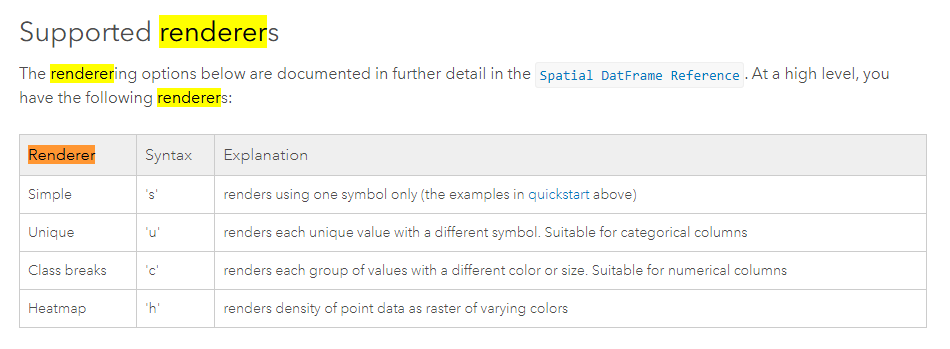

In [70]:
# Visualizatino Cmap options

In [7]:
from arcgis.mapping import symbol

colormaps = symbol.ALLOWED_CMAPS
for a,b,c,d,e in zip(colormaps[::5], colormaps[1::5], colormaps[2::5], colormaps[3::5], colormaps[4::5]):
    print("{:<20}{:<20}{:<20}{:<20}{:<}".format(a,b,c,d,e))

Accent              Accent_r            Blues               Blues_r             BrBG
BrBG_r              BuGn                BuGn_r              BuPu                BuPu_r
CMRmap              CMRmap_r            Dark2               Dark2_r             GnBu
GnBu_r              Greens              Greens_r            Greys               Greys_r
OrRd                OrRd_r              Oranges             Oranges_r           PRGn
PRGn_r              Paired              Paired_r            Pastel1             Pastel1_r
Pastel2             Pastel2_r           PiYG                PiYG_r              PuBu
PuBuGn              PuBuGn_r            PuBu_r              PuOr                PuOr_r
PuRd                PuRd_r              Purples             Purples_r           RdBu
RdBu_r              RdGy                RdGy_r              RdPu                RdPu_r
RdYlBu              RdYlBu_r            RdYlGn              RdYlGn_r            Reds
Reds_r              Set1                Set1_r     

In [71]:
# Problem and solution
# https://github.com/danioxoli/HotSpotAnalysis_Plugin/issues/36#issuecomment-509184014

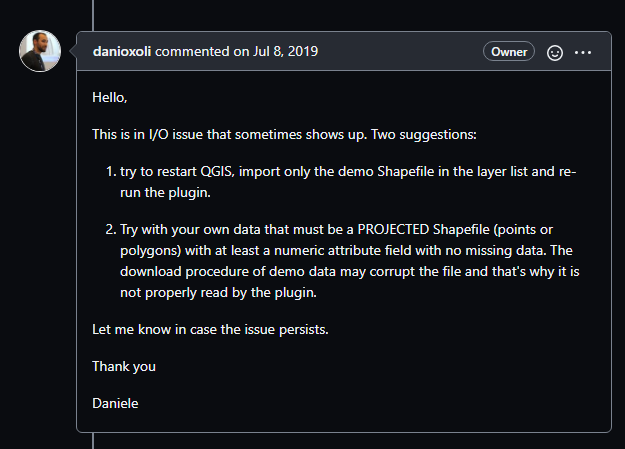

In [ ]:
# By using FME, change csv to sdf

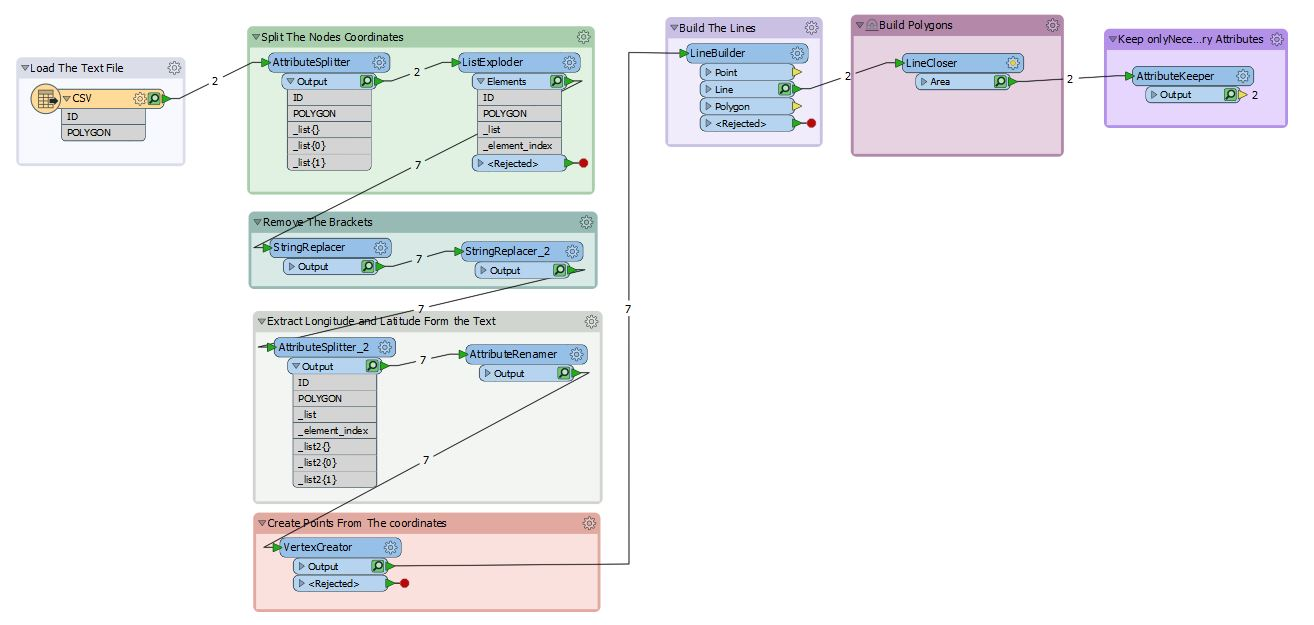

In [28]:
# From sdf to geodataframe
# => Then what is the reverse process: from geodataframe to sdf?

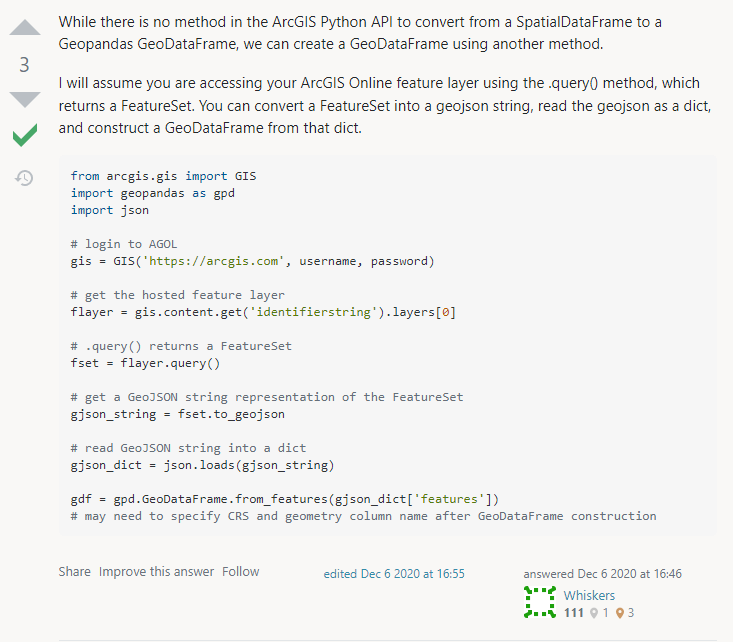

In [62]:
# Spatial Analysis Reference
# https://developers.arcgis.com/python/sample-notebooks/analyzing-violent-crime/
# https://developers.arcgis.com/python/sample-notebooks/analyzing-growth-factors-of-airbnb-properties-in-new-york-city/
# https://developers.arcgis.com/python/guide/advanced-cartography-part1/
# https://developers.arcgis.com/python/sample-notebooks/analyzing-growth-factors-of-airbnb-properties-in-new-york-city/

In [ ]:
# How to spatial plot from sdf to map widget
#
#ACSblock1917_sdf.spatial.plot(
#    map_widget = map2,
#    renderer_type = 'c',  # for class breaks renderer\
#    method = 'esriClassifyNaturalBreaks',  # classification algorithm
#    class_count = 6,  # choose the number of classes
#    col = 'rc_w_19',  # numeric column to classify
#    cmap = 'RdYlGn',  # color map to pick colors from for each class
#    alpha=0.55,  # specify opacity
#    line_width = 0.1
#)

In [ ]:
# Different way to add web layer to map widget with url
#
# map3.add_layer({"type":"FeatureLayer",
#                 "url":"http://services1.arcgis.com/hLJbHVT9ZrDIzK0I/arcgis/rest/services/EQMagGt4/FeatureServer/0",
#                 "renderer":"HeatmapRenderer",
#                 "opacity":0.75})